# Kolekcja danych


In [1]:
import pandas as pd

heart_disease_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
col_names = ['age','sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope', 'ca','thal','num']

data = pd.read_csv(heart_disease_url,names=col_names)

# sex 1 == male; 2 == female
# cp - chest pain type (1 == typical angina; 2 == atypical angina; 3 == non-anginal pain; 4 == asymptomatic)
# trestbps - resting blood presure
# chol - cholesterol lebel
# fbs - (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
# restecg - resting electrocardiographic results (0 == normal, 1 == abnormality; 2 == left Estes hypertophy )
# thalach - maximum heart rate achieved
# exang -  exercise induced angina (1 == yes; 0 == no)
# oldpeak - ST depression induced by exercise relative to rest
# slope - the slope of the peak exercise ST segment (1 == upsloping; 2 == flat; 3 == downsloping)
# ca: number of major vessels colored by flourosopy (0-3) 
# thal: (3 == normal; 6 == fixed defect; 7 == reversable defect)
# num: diagnosis of heart disease (angiographic disease status); (0: < 50% diameter narrowing; 1: > 50% diameter narrowing)



# Eksploracja i czyszczenie danych

In [2]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [4]:
nulls = data.isnull().sum()
nulls

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Brak wartości typu null, zbiór jest czysty.

<AxesSubplot:>

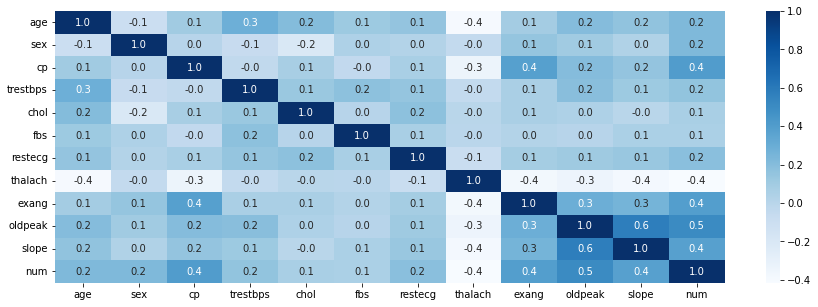

In [5]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(15,5))
corr = data.corr()
sns.heatmap(corr, cmap="Blues", annot=True,fmt=".1f")

In [6]:
import numpy as np
data = data.replace("?", np.nan) 
data.dropna(inplace = True)

y = data.num

X = data.drop(['num','fbs'], axis=1)

Mimo braku wartości null, zbiór okazał się posiadać wartości '?'. Zdecydowaliśmy się usunąć te rekordy, gdyż jest ich mało

In [7]:
y.value_counts() 

0    160
1     54
2     35
3     35
4     13
Name: num, dtype: int64

<AxesSubplot:xlabel='num', ylabel='Count'>

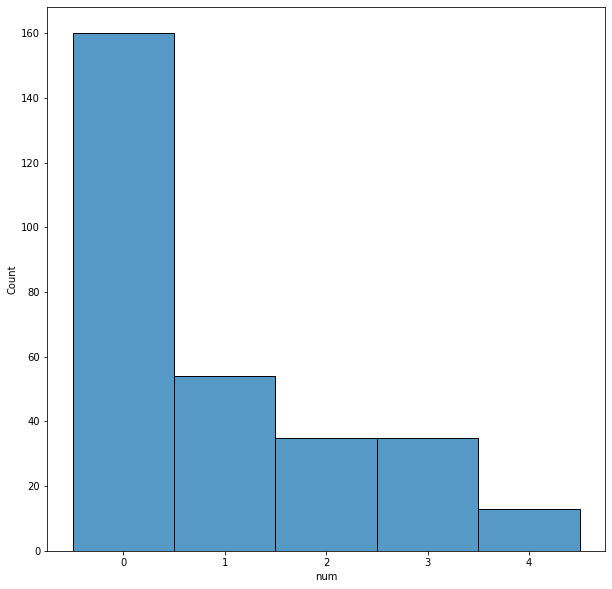

In [8]:
plt.figure(figsize=(10,10))
sns.histplot(y,discrete=True)

Dane są nierówno rozłożne, będzie trzeba użyć stratify.


# Podział danych

In [9]:
from sklearn.model_selection import train_test_split
X.ca = X.ca.astype('float64') 
X.thal = X.thal.astype('float64')
X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.75,test_size=0.25, random_state = 0,stratify=y)
cols = list(X_train.columns)


# Skalowanie danych 

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# standaryzacja
s = StandardScaler()
stand_X_train = pd.DataFrame(s.fit_transform(X_train), columns=X_train.columns)
stand_X_valid = pd.DataFrame(s.transform(X_valid), columns=X_valid.columns)

# Modelowanie danych

## SVM

In [16]:
# model SVC_2 -> dane standaryzowane
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model_2 = SVC(random_state=1)
model_2.fit(stand_X_train, y_train)
pred_2 = model_2.predict(stand_X_valid)
print(f'Wielkosc y_valid: {y_valid.shape}, wielkosc pred_2: {pred_2.shape}')
accuracy_score(y_valid,pred_2)

Wielkosc y_valid: (75,), wielkosc pred_2: (75,)


0.6266666666666667

## Sieć neuronowa

In [17]:
from tensorflow.keras.layers import Input, Dense
from keras.callbacks import EarlyStopping
from tensorflow import keras
import tensorflow as tf

model_5 = keras.Sequential([
    Dense(units=50, activation='relu', input_shape=[12]),
    Dense(units=25, activation='relu'),
    Dense(5, activation='softmax')

])

model_5.compile(
        loss="sparse_categorical_crossentropy", 
        optimizer= "adam",
        metrics=['accuracy']
    )   
history = model_5.fit(
        stand_X_train, y_train,        
        validation_data=None,
        batch_size=30,
        epochs=30
)


Epoch 1/30
8/8 [==============================] - 1s 5ms/step - loss: 1.6875 - accuracy: 0.1892
Epoch 2/30
8/8 [==============================] - 0s 5ms/step - loss: 1.5149 - accuracy: 0.3198
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 1.3869 - accuracy: 0.5180
Epoch 4/30
8/8 [==============================] - 0s 2ms/step - loss: 1.2779 - accuracy: 0.5631
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 1.1949 - accuracy: 0.5676
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: 1.1219 - accuracy: 0.5856
Epoch 7/30
8/8 [==============================] - 0s 2ms/step - loss: 1.0645 - accuracy: 0.5856
Epoch 8/30
8/8 [==============================] - 0s 2ms/step - loss: 1.0206 - accuracy: 0.5901
Epoch 9/30
8/8 [==============================] - 0s 2ms/step - loss: 0.9844 - accuracy: 0.6036
Epoch 10/30
8/8 [==============================] - 0s 1ms/step - loss: 0.9575 - accuracy: 0.6126
Epoch 11/30
8/8 [======================

In [18]:
pred_5 = model_5.predict(stand_X_valid)
pred_5_1 = np.argmax(pred_5,axis=1)
pred_5_1
accuracy_score(y_valid,pred_5_1)

0.5866666666666667

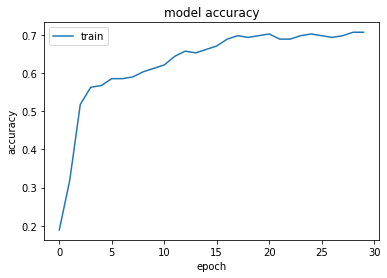

In [19]:
# proces uczenia sieci na zbiorze treningowym
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


## Zapisany model sieci neuronowej z dokładnością 72%

In [20]:
# plik pickle dostępny pod adresem
# https://drive.google.com/file/d/1oTM95Cl0M1REqvNtxh2KUKmAHN_Uw7V3/view?usp=sharing
# należy pobrać i umieścić w folderze z projektem w google colab
# lokalnie na dysku mogą wystąpić problemy z czytaniem pliku
'''
import pickle
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_pred = pickled_model.predict(stand_norm_X_valid)
pickled_pred = np.argmax(pickled_pred,axis=1)
accuracy_score(y_valid,pickled_pred)
'''

"\nimport pickle\npickled_model = pickle.load(open('model.pkl', 'rb'))\npickled_pred = pickled_model.predict(stand_norm_X_valid)\npickled_pred = np.argmax(pickled_pred,axis=1)\naccuracy_score(y_valid,pickled_pred)\n"

## XGBoost

In [21]:
from xgboost import XGBClassifier

model_6 = XGBClassifier(max_depth = 3, learning_rate = 0.01, n_estimators = 250,random_state=1)
model_6.fit(stand_X_train, y_train)
pred_6 = model_6.predict(stand_X_valid)

accuracy_score(y_valid,pred_6)


0.5733333333333334

## Naiwny klasyfikator Bayesa

In [22]:
from sklearn.naive_bayes import GaussianNB
model_7 = GaussianNB()
model_7.fit(stand_X_train, y_train)
pred_7 = model_7.predict(stand_X_valid)
accuracy_score(y_valid,pred_7)

0.6266666666666667

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
estimators = [1,10,50,200]
features = ['sqrt','log2',None]
for feature in features:
    for e in estimators:
        rf_model = RandomForestClassifier(n_estimators=e, max_features=feature, random_state=1)
        rf_model.fit(stand_X_train, y_train)
        pred_8 = rf_model.predict(stand_X_valid)
        print("estimators=",e," | max_features=",feature," | accuracy:",accuracy_score(y_valid,pred_8))

estimators= 1  | max_features= sqrt  | accuracy: 0.5466666666666666
estimators= 10  | max_features= sqrt  | accuracy: 0.5733333333333334
estimators= 50  | max_features= sqrt  | accuracy: 0.5733333333333334
estimators= 200  | max_features= sqrt  | accuracy: 0.6
estimators= 1  | max_features= log2  | accuracy: 0.5466666666666666
estimators= 10  | max_features= log2  | accuracy: 0.5733333333333334
estimators= 50  | max_features= log2  | accuracy: 0.5733333333333334
estimators= 200  | max_features= log2  | accuracy: 0.6
estimators= 1  | max_features= None  | accuracy: 0.5866666666666667
estimators= 10  | max_features= None  | accuracy: 0.56
estimators= 50  | max_features= None  | accuracy: 0.6
estimators= 200  | max_features= None  | accuracy: 0.6133333333333333


## Bagging

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_model = BaggingClassifier(
  base_estimator=DecisionTreeClassifier(), 
  n_estimators=100, 
  max_samples=0.8, 
  bootstrap=True,
  oob_score=True,
  random_state=1
)
bag_model.fit(stand_X_train, y_train)

pred_9 = bag_model.predict(stand_X_valid)

accuracy_score(y_valid,pred_9)

0.6266666666666667